# Geometric Transformations

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [3]:
def cvimshow (im, g=False):
    plt.figure(figsize=(10,10))
    plt.imshow(im[:,:,::-1])
    plt.axis(False)
    
def gimshow (im):
    plt.figure(figsize=(10,10))
    plt.imshow (im, cmap='gray')
    plt.axis(False)

In [4]:
im = cv.imread ('nature-500x375.jpg')

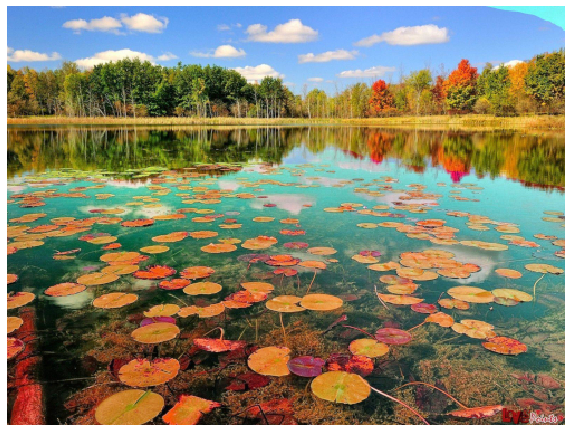

In [5]:
cvimshow(im)

## Similarity Transformation

In [20]:
rows,cols = im.shape[:2]
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(center=(cols/2.0,rows/2.0), angle=30, scale=1)
print ('M =\n', M)
dst = cv.warpAffine(im,M,(cols,rows))

M =
 [[  0.8660254    0.5        -60.25635095]
 [ -0.5          0.8660254  150.12023679]]


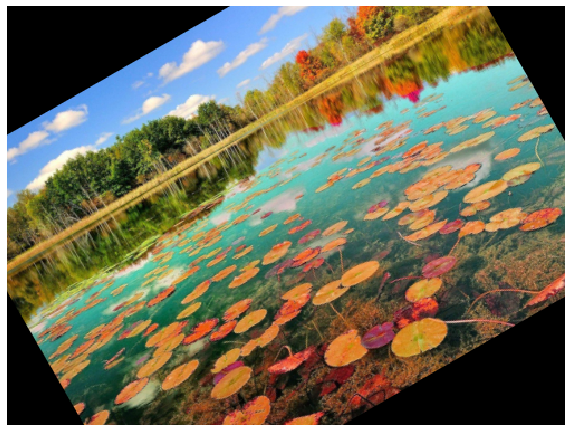

In [21]:
cvimshow(dst)

## Affine Transformation

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc9e2763400>,
 Text(0.5, 1.0, 'Output'),
 (-0.5, 499.5, 374.5, -0.5))

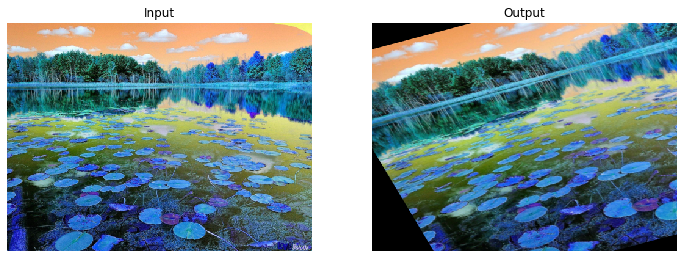

In [27]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
#
dst = cv.warpAffine(im,M,(cols,rows))
#
plt.figure(figsize=(12,7))
plt.subplot(121), plt.imshow(im), plt.title('Input'), plt.axis(False)
plt.subplot(122), plt.imshow(dst),plt.title('Output'), plt.axis(False)

## Perspective Transformation (Homography)

(423, 419, 3)
M=
 [[ 1.05587376e+00  9.18151097e-02 -6.50969128e+01]
 [ 4.69010049e-02  1.12562412e+00 -7.57920240e+01]
 [ 1.83251448e-04  5.13337001e-04  1.00000000e+00]]


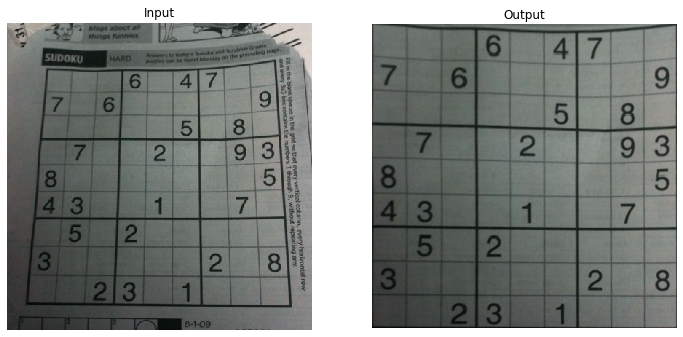

In [43]:
img = cv.imread('sudoku-original.jpg')
print (img.shape)

rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
#
M = cv.getPerspectiveTransform(pts1,pts2)
#
dst = cv.warpPerspective(img,M,(300,300))
#
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img),plt.title('Input'),plt.axis(False)
plt.subplot(122),plt.imshow(dst),plt.title('Output'), plt.axis(False)
print ('M=\n', M)

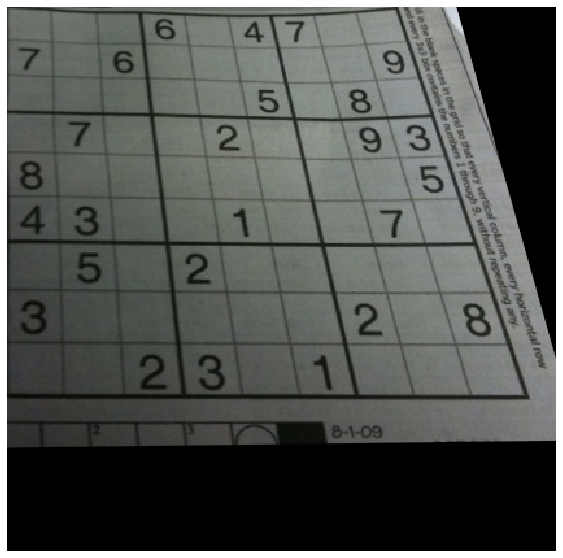

In [45]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[400,300]])
#
M = cv.getPerspectiveTransform(pts1,pts2)
dst2 = cv.warpPerspective(img, M, dsize=(rows,cols))
cvimshow(dst2)

In [36]:
M

array([[ 1.05587376e+00,  9.18151097e-02, -6.50969128e+01],
       [ 4.69010049e-02,  1.12562412e+00, -7.57920240e+01],
       [ 1.83251448e-04,  5.13337001e-04,  1.00000000e+00]])

In [34]:
M @ np.array( [[0,0,1]] ).T

array([[-65.09691276],
       [-75.79202398],
       [  1.        ]])

In [35]:
M @ np.array( [[cols,0,1]] ).T

array([[377.31419322],
       [-56.14050291],
       [  1.07678236]])

In [37]:
M @ np.array( [[0,rows,1]] ).T

array([[-26.25912137],
       [400.34697815],
       [  1.21714155]])

## Linear/Bilinear Interpolation

### Linear Interpolation
Given $t$ the computed location in source image,
$$
    i = int(t) \\
    \alpha = t - i \\
    dst = (1-\alpha)*src[i] + \alpha*src[i+1] \\
    dst = src[i] + \alpha*(src[i+1] - src[i])
$$

### Bi-linear Interpolation
Given $(y, x)$, the computed non-grid location in source image,
1. apply for $y$ twice
2. apply for $x$ twice using the two interpolated values in the first step